# LIBRARIES

In [76]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.cm as cm # matplotlib's color map library

# READ AND TRANSFORM DATA TO X, Y, Z

In [ ]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# TRANSFORM FROM TABLE WITH ELEVATION TO X, Y, Z
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes

# SIMPLE TERRAIN

In [74]:
def terrain(df):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(azim = 45, elev = 45)

terrain(df)

# INTERACTIVE TERRAIN

In [71]:
def terrain_3d(a, e):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(azim = a, elev = e)

interact(terrain_3d, a = (0, 90, 10), e = (0, 90, 10));

interactive(children=(IntSlider(value=40, description='a', max=90, step=10), IntSlider(value=40, description='…

# CONTOUR PLOT

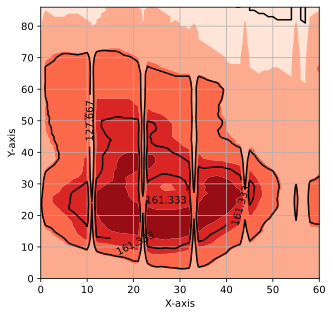

In [75]:
#DF SHOULD BE IN FORM X, Y, Z!!

def contour_plt(df, no_con):
    Z = df.pivot_table(index='X', columns='Y', values='Z').T.values

    X_unique = np.sort(df.X.unique())
    Y_unique = np.sort(df.Y.unique())
    X, Y = np.meshgrid(X_unique, Y_unique)

    # Initialize plot objects
    rcParams['figure.figsize'] = 5, 5 # sets plot size
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Define levels in z-axis where we want lines to appear
    levels = np.linspace(np.min(df['Z']), np.max(df['Z']), no_con)

    # Generate a color mapping of the levels we've specified
    cpf = ax.contourf(X, Y, Z, len(levels), cmap = cm.Reds)

    # Set all level lines to black
    line_colors = ['black' for l in cpf.levels]

    # Make plot and customize axes
    cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
    ax.clabel(cp, fontsize=10, colors=line_colors)
    plt.xticks()
    plt.yticks()
    ax.set_xlabel('X-axis')
    _ = ax.set_ylabel('Y-axis')
    plt.grid()
    
contour_plt(df, 4)